# Q1
 ### Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?

> #### Introduction to Enron Dataset
>Enron was one of the largest companies in the United States resulting into bankruptcy due to corporate fraud  which is one of the largest bankruptcies in U.S. History.In the resulting Federal investigation, there was a significant amount of typically confidential information entered into public record, including tens of thousands of emails and detailed financial data for top executives.

>The main goal is identifying person of interests (POI's) using supervised machine learning algorithms for prediction.This model will classify weather the individual is a POI or notPOI by  using rest of the features available and various machine learning algorithms.


In [1]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
financial_features = ['salary', 'deferral_payments', 'total_payments',
'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income',
'total_stock_value', 'expenses', 'exercised_stock_options', 'other',
'long_term_incentive', 'restricted_stock', 'director_fees']#(all units are in US dollars)

email_features = ['to_messages', 'from_poi_to_this_person', 'email_address',
'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']
#(units are generally number of emails messages;
#notable exception is ‘email_address’, which is a text string)

poi_label = ['poi']# (boolean, represented as integer)


features_list = poi_label + financial_features + email_features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)








D:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import pandas as pd
import numpy as np
enron= pd.DataFrame.from_dict(data_dict, orient = 'index')
print"total poi in dataset:", sum(enron['poi']==1)

enron.describe()
#We can see all the null values for each index


total poi in dataset: 18


,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
count,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146
unique,95,87,40,126,102,42,98,84,19,125,...,5,65,93,42,2,18,45,53,112,58
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
freq,51,60,107,21,44,64,36,60,128,20,...,142,60,53,60,128,129,97,80,35,60


In [3]:
enron = enron.replace('NaN', np.nan)
print(enron.info())
enron.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       95 non-null float64
to_messages                  86 non-null float64
deferral_payments            39 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
bonus                        82 non-null float64
restricted_stock             110 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
loan_advances                4 non-null float64
from_messages                86 non-null float64
other                        93 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          146 non-null bool
director_fees                17 non-null float64
deferred_income              49 non-null float

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
count,9.500000e+01,86.000000,3.900000e+01,1.250000e+02,1.020000e+02,8.200000e+01,1.100000e+02,86.000000,1.800000e+01,1.260000e+02,9.500000e+01,4.000000e+00,86.000000,9.300000e+01,86.000000,1.700000e+01,4.900000e+01,6.600000e+01,86.000000
mean,5.621943e+05,2073.860465,1.642674e+06,5.081526e+06,5.987054e+06,2.374235e+06,2.321741e+06,1176.465116,1.664106e+05,6.773957e+06,1.087289e+05,4.196250e+07,608.790698,9.190650e+05,41.232558,1.668049e+05,-1.140475e+06,1.470361e+06,64.895349
std,2.716369e+06,2582.700981,5.161930e+06,2.906172e+07,3.106201e+07,1.071333e+07,1.251828e+07,1178.317641,4.201494e+06,3.895777e+07,5.335348e+05,4.708321e+07,1841.033949,4.589253e+06,100.073111,3.198914e+05,4.025406e+06,5.942759e+06,86.979244
min,4.770000e+02,57.000000,-1.025000e+05,1.480000e+02,3.285000e+03,7.000000e+04,-2.604490e+06,2.000000,-7.576788e+06,-4.409300e+04,1.480000e+02,4.000000e+05,12.000000,2.000000e+00,0.000000,3.285000e+03,-2.799289e+07,6.922300e+04,0.000000
25%,2.118160e+05,541.250000,8.157300e+04,3.944750e+05,5.278862e+05,4.312500e+05,2.540180e+05,249.750000,-3.896218e+05,4.945102e+05,2.261400e+04,1.600000e+06,22.750000,1.215000e+03,1.000000,9.878400e+04,-6.948620e+05,2.812500e+05,10.000000
50%,2.599960e+05,1211.000000,2.274490e+05,1.101393e+06,1.310814e+06,7.693750e+05,4.517400e+05,740.500000,-1.469750e+05,1.102872e+06,4.695000e+04,4.176250e+07,41.000000,5.238200e+04,8.000000,1.085790e+05,-1.597920e+05,4.420350e+05,35.000000
75%,3.121170e+05,2634.750000,1.002672e+06,2.093263e+06,2.547724e+06,1.200000e+06,1.002370e+06,1888.250000,-7.500975e+04,2.949847e+06,7.995250e+04,8.212500e+07,145.500000,3.620960e+05,24.750000,1.137840e+05,-3.834600e+04,9.386720e+05,72.250000
max,2.670423e+07,15149.000000,3.208340e+07,3.098866e+08,3.117640e+08,9.734362e+07,1.303223e+08,5521.000000,1.545629e+07,4.345095e+08,5.235198e+06,8.392500e+07,14368.000000,4.266759e+07,609.000000,1.398517e+06,-8.330000e+02,4.852193e+07,528.000000


From th above information about dataset we can conlcude that any point with less than 73 non-null  will be having more than 50%
of missing data.
And the features seem to be in more than 50% null group

|Feature|No.of non-null out of 146|
|---|---|
|deferral_payments        |    39 non-null| 
|restricted_stock_deferred   | 18 non-null|
|loan_advances          |      4 non-null|
|director_fees            |    17 non-null |
|deferred_income          |    49 non-null |
|long_term_incentive      |    66 non-null |


In [4]:
#now checking these features for poi to conclude how much of data is missing for a poi .
missing = ['loan_advances', 'director_fees', 'restricted_stock_deferred',\
           'deferral_payments', 'deferred_income', 'long_term_incentive']
enron_poi=enron[enron['poi']==1][missing]
enron_poi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, BELDEN TIMOTHY N to YEAGER F SCOTT
Data columns (total 6 columns):
loan_advances                1 non-null float64
director_fees                0 non-null float64
restricted_stock_deferred    0 non-null float64
deferral_payments            5 non-null float64
deferred_income              11 non-null float64
long_term_incentive          12 non-null float64
dtypes: float64(6)
memory usage: 1008.0+ bytes


In [5]:
# its better to remove these with less non null values
removing = ['loan_advances', 'director_fees', 'restricted_stock_deferred']
for x in removing:
    if x in features_list:
        features_list.remove(x)
features_list

['poi',
 'salary',
 'deferral_payments',
 'total_payments',
 'bonus',
 'deferred_income',
 'total_stock_value',
 'expenses',
 'exercised_stock_options',
 'other',
 'long_term_incentive',
 'restricted_stock',
 'to_messages',
 'from_poi_to_this_person',
 'email_address',
 'from_messages',
 'from_this_person_to_poi',
 'shared_receipt_with_poi']

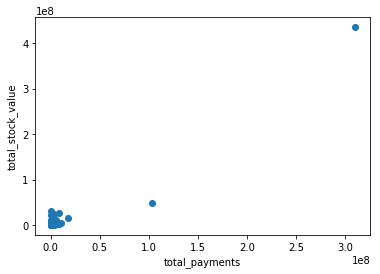

In [6]:
### Task 2: Remove outliers
#visualising the outlier

import matplotlib.pyplot

e = enron[(enron.total_payments != np.nan) & (enron.total_stock_value != np.nan)]

matplotlib.pyplot.scatter(x="total_payments", y="total_stock_value", data=e)

matplotlib.pyplot.xlabel("total_payments")
matplotlib.pyplot.ylabel("total_stock_value")
matplotlib.pyplot.show()

In [7]:
# removing outlier 
enron.total_payments.idxmax()


'TOTAL'

In [8]:
#droping total it must be a spreadsheet mistake
enron=enron.drop("TOTAL")

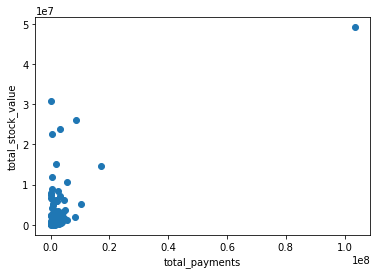

'LAY KENNETH L'

In [9]:
#data_dict.pop( 'TOTAL', 0 )

e = enron[(enron.total_payments != np.nan) & (enron.total_stock_value != np.nan)]

matplotlib.pyplot.scatter(x="total_payments", y="total_stock_value", data=e)
matplotlib.pyplot.xlabel("total_payments")
matplotlib.pyplot.ylabel("total_stock_value")
matplotlib.pyplot.show()
enron.total_payments.idxmax()


 LAY KENNETH L  is the next outlier but it is a valid point 

In [10]:
enron = enron.replace(np.nan, 'NaN') # since to use tester code, i needed to convert back to "NaN"
data_dict = enron[features_list].to_dict(orient = 'index')

In [11]:
from tester import test_classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
if "email_address" in features_list:
    features_list.remove("email_address")
    feat=features_list
else :
    feat=features_list
test_classifier(clf, data_dict, feat)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.79813	Precision: 0.22947	Recall: 0.21800	F1: 0.22359	F2: 0.22020
	Total predictions: 15000	True positives:  436	False positives: 1464	False negatives: 1564	True negatives: 11536



# Q2

### What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.

In [12]:
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict



In [13]:
#Adding two new features
for key, value in my_dataset.items():
    if value['from_messages'] == 'NaN' or value['from_this_person_to_poi'] == 'NaN':
        value['person_to_poi/total_msgs'] = 0.0
    else:
        value['person_to_poi/total_msgs'] = value['from_this_person_to_poi'] / (1.0*value['from_messages'])

    if value['to_messages'] == 'NaN' or value['from_poi_to_this_person'] == 'NaN':
        value['poi_to_person/to_msgs'] = 0.0
    else:
        value['poi_to_person/to_msgs'] = value['from_poi_to_this_person'] / (1.0*value['to_messages'])
features_new_list=features_list+['person_to_poi/total_msgs','poi_to_person/to_msgs']

In [14]:

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_new_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
from sklearn.ensemble import ExtraTreesClassifier

clf= ExtraTreesClassifier()

clf.fit(features, labels)
result = pd.DataFrame(clf.feature_importances_,
                          index=features_new_list[1:])
result.columns = ['Importances']
result = result.sort(['Importances'], ascending=False)
result[:10]


D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Importances
exercised_stock_options,0.155722
person_to_poi/total_msgs,0.097685
bonus,0.085482
deferred_income,0.084499
restricted_stock,0.062858
from_this_person_to_poi,0.058244
salary,0.049674
to_messages,0.046025
total_payments,0.045579
total_stock_value,0.044452


In [15]:
# leakage = [ 'poi_to_person/to_msgs','from_messages','person_to_poi/total_msgs''to_messages', 'from_poi_to_this_person',\
#            'from_messages',\
#  'from_this_person_to_poi',\
#  'shared_receipt_with_poi',\
#            'person_to_poi/total_msgs']
# features_new_list = [feat for feat in features_new_list if feat not in leakage]
# features_new_list

In [40]:
from tester import test_classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
if "email_address" in features_list:
    features_list.remove("email_address")
    feat=features_list
else :
    feat=features_list
test_classifier(clf, my_dataset, features_new_list)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.81767	Precision: 0.31144	Recall: 0.30350	F1: 0.30742	F2: 0.30506
	Total predictions: 15000	True positives:  607	False positives: 1342	False negatives: 1393	True negatives: 11658



### From the above we can observe

## Q3

**What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?**

In [93]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines.
# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2
from sklearn.feature_selection import RFE 
from sklearn import tree
from sklearn.svm import SVC, SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cross_validation import train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV


In [130]:
parameters={}
parameters["DecisionTreeClassifier"] = [{'min_samples_split': [2,3,4], 'criterion': ['gini', 'entropy']}]
parameters["GaussianNB"] = [{ 'selection__k':[9,10,11], 'pca__n_components': [6,7,8] }]
parameters["SVC"] =[{ 'selection__k':[10],"svc__C":[x/10.0 for x in range(1000, 1100,10)] ,
                  "svc__kernel" : ['poly', 'rbf', 'sigmoid']}]
#[{"selection__k": [ 8,9, 10] ,'pca__n_components': [6,7,8] ,'svc__kernel': ['poly', 'rbf', 'sigmoid'], 'svc__C':  [x/10.0 for x in range(1, 10)], 'svc__gamma': [1e-3,1e-4] }]
#parameters["SVC"] =[{ "selection__k": [ 8,9, 10],'pca__n_components': [6,7,8] ,'svc__C' : [x/100.0 for x in range(1000, 2000,10)][0.1,1,10,100,1000],'svc__kernel' : ['poly', 'rbf', 'sigmoid']}] 
# parameters["AdaBoostClassifier"] = [{"selection__k": [ 8,9, 10], 'ada__learning_rate' : [x/20.0 for x in range(1, 20)],'ada__n_estimators' : [10,50,100],\
#                     'ada__algorithm': ['SAMME','SAMME.R'] }],{ 'svc__kernel': ['linear'], 'svc__C':[1,10,100,1000] 
parameters["AdaBoostClassifier"] = [{ 'learning_rate' : [x/20.0 for x in range(1, 10)],'n_estimators' : [10,50],\
                    'algorithm': ['SAMME','SAMME.R'] }]
parameters["KNeighborsClassifier"] = [{ 'selection__k':[10],'pca__n_components': [6,7,8] ,"knn__n_neighbors": range(3,4), 'knn__weights': ['uniform','distance'], 'knn__algorithm': ['ball_tree','kd_tree','brute']}]
# parameters["RandomForestClassifier"]=[{"R__max_depth": [3, None],
#               "R__max_features": [1, 3, 5],
#               "R__min_samples_split": [2, 3, 5],
#               "R__min_samples_leaf": [1, 3, 5],
#               "R__bootstrap": [True, False],
#               "R__criterion": ["gini", "entropy"],
#               "selection__k": [ 8, 10],
#               'pca__n_components': [6,7,8]}]
pipe={}
pipe["DecisionTreeClassifier"] = DecisionTreeClassifier()
pipe["GaussianNB"] = Pipeline([('scaler', MinMaxScaler()),('selection', SelectKBest()),('pca', PCA()),('naive_bayes', GaussianNB())])
pipe["SVC"] =Pipeline([('selection', SelectKBest()),('scaler', StandardScaler()),('svc', SVC())])
#Pipeline([('selection', SelectKBest()),('scaler', StandardScaler()),('pca', PCA()),('svc', SVC())])
pipe["AdaBoostClassifier"] =  AdaBoostClassifier()
pipe["KNeighborsClassifier"] = Pipeline([('selection',SelectKBest()),('pca', PCA()), ('knn', KNeighborsClassifier())])
#pipe["RandomForestClassifier"]=Pipeline([('selection',SelectKBest()),('pca', PCA()), ('R', RandomForestClassifier())])


In [19]:

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html
data = featureFormat(my_dataset, features_new_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [143]:
clf=DecisionTreeClassifier()
clf_name = clf.__class__.__name__
grid = GridSearchCV(estimator =pipe[clf_name],param_grid = parameters[clf_name],\
                                cv = StratifiedKFold(labels_train, n_folds = 6, shuffle = True) \
                            ,n_jobs = -1,scoring = 'f1')
grid.fit(features_train, labels_train)
print clf_name 
test_classifier(grid.best_estimator_, my_dataset, features_new_list)

DecisionTreeClassifier
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.83093	Precision: 0.36465	Recall: 0.36100	F1: 0.36281	F2: 0.36172
	Total predictions: 15000	True positives:  722	False positives: 1258	False negatives: 1278	True negatives: 11742



In [142]:
clf=AdaBoostClassifier()
clf_name = clf.__class__.__name__
grid = GridSearchCV(estimator =pipe[clf_name],param_grid = parameters[clf_name],\
                                cv = StratifiedKFold(labels_train, n_folds = 6, shuffle = True) \
                            ,n_jobs = -1,scoring = 'f1')
grid.fit(features_train, labels_train)
print clf_name 
test_classifier(grid.best_estimator_, my_dataset, features_new_list)

AdaBoostClassifier
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.45, n_estimators=50, random_state=None)
	Accuracy: 0.84947	Precision: 0.41434	Recall: 0.31200	F1: 0.35596	F2: 0.32821
	Total predictions: 15000	True positives:  624	False positives:  882	False negatives: 1376	True negatives: 12118



In [144]:
clf=SVC()
clf_name = clf.__class__.__name__
grid = GridSearchCV(estimator =pipe[clf_name],param_grid = parameters[clf_name],\
                                cv = StratifiedKFold(labels_train, n_folds = 6, shuffle = True) \
                            ,n_jobs = -1,scoring = 'f1')
grid.fit(features_train, labels_train)
print clf_name 
test_classifier(grid.best_estimator_, my_dataset, features_new_list)

SVC
Pipeline(steps=[('selection', SelectKBest(k=10, score_func=<function f_classif at 0x000000000C01FF98>)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
	Accuracy: 0.81613	Precision: 0.30301	Recall: 0.29150	F1: 0.29715	F2: 0.29373
	Total predictions: 15000	True positives:  583	False positives: 1341	False negatives: 1417	True negatives: 11659



In [145]:
clf=GaussianNB()
clf_name = clf.__class__.__name__
grid = GridSearchCV(estimator =pipe[clf_name],param_grid = parameters[clf_name],\
                                cv = StratifiedKFold(labels_train, n_folds = 6, shuffle = True) \
                            ,n_jobs = -1,scoring = 'f1')
grid.fit(features_train, labels_train)
print clf_name 
test_classifier(grid.best_estimator_, my_dataset, features_new_list)

GaussianNB
Pipeline(steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selection', SelectKBest(k=9, score_func=<function f_classif at 0x000000000C01FF98>)), ('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('naive_bayes', GaussianNB(priors=None))])
	Accuracy: 0.81427	Precision: 0.30754	Recall: 0.31400	F1: 0.31074	F2: 0.31269
	Total predictions: 15000	True positives:  628	False positives: 1414	False negatives: 1372	True negatives: 11586



In [146]:
clf=KNeighborsClassifier()
clf_name = clf.__class__.__name__
grid = GridSearchCV(estimator =pipe[clf_name],param_grid = parameters[clf_name],\
                                cv = StratifiedKFold(labels_train, n_folds = 6, shuffle = True) \
                            ,n_jobs = -1,scoring = 'f1')
grid.fit(features_train, labels_train)
print clf_name 
test_classifier(grid.best_estimator_, my_dataset, features_new_list)

KNeighborsClassifier
Pipeline(steps=[('selection', SelectKBest(k=10, score_func=<function f_classif at 0x000000000C01FF98>)), ('pca', PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'))])
	Accuracy: 0.87227	Precision: 0.53832	Recall: 0.29500	F1: 0.38114	F2: 0.32432
	Total predictions: 15000	True positives:  590	False positives:  506	False negatives: 1410	True negatives: 12494



In [21]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

## Q4

**What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier)**

Tuning a parameter of an algorithm's main focus is to optimize and get the best output.It mainly focuses on balancing the bias variance trade off ,

|High bias model:|High variance model:|
|------------|-----------|
|where it does not have the capacity to learn anything practically and ignores data.| good at recreating data that it has seen before.Where it cannot generalize new data.|


We need a low bias and low variance model to get the most optimized output.
Not all the parameters need to be tuned , but there might be a chance for underfitting or overfitting the data,for these cases we need to tune certain parameters of a given estimator.

Gaussian NB doesnt have any parameters for tuning.
Tuning is done by using GridSearchCV ,

GridSearchCV basically is a  systematic way of working through various conjuctions of parameter tunes, cross-validating as it goes to determine which tune gives the best performance.

For a given Machine learning algorithm ,for high performance there are diiferent tuning parameters ,
to find them we use gridsearchCV.
If we input few tuning parameter with a list of possible values for each parameter and it makes different combinations. Grid search technique gives parameters that maximize the score,Which leads to Optimization of learning algorithm.

The grid search used a stratified k-fold (set to 6) cross validation so that test and train subset were balanced over the target POI class. 
My goal was to maximize the precision and recall score so i choose scoring parameter as 'f1' to get a optimized model selection.

## Q5

**What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?**

 The measure of estimating the model's performance on unseen data is called Validation. The major problem with machine learning algorithm is underfitting or overfitting of our data. The most important thing is to  get to know how the model will generalize to unseen data.
 
 We split our data into unseen (testing data) and training data to measure the preformance of the model.For example taking k-fold technique in picture 
 
k-fold technique:

>First we divide our data set into k parts.A single part is selected as test set and rest (k-1) parts are taken as training set.

>>We run  Different learning experiments,every part acts as the testing set one time, and rest acts as the training set K-1 times.

>>Assume  a1,a2,....ak (a is the data set and divided into k parts).In each k experiments you pick one of the subsets in aloop from a1 to ak  as testing data and rest as training data.

 >>We take average of the test result performance by  running multiple times(ie,train our machine learing algoritm and test it using our test set).
   
   >If we observe Kfold is using all the data for testing as well as all the data for training , hence average of these test results gives us an accurate score.
   
>>In grid search there might be a chance to overfit the validation set since we use it many times to evaluate performance of different points on the grid and choose a point that delivered good performance.

>>Without k-fold cross-validation the risk is higher that grid search will select different parameter value combinations that perform very well on a specific train-test split but poorly on some.


We used stratified kfold cross validation.This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.  Stratification of folds in a cross-validation ensure that each test and train set have a balanced proportion of the target class.Hence the number of poi to non pois in each fold would be equal,leading to optimized output.

## Q6

**Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. **

I would like to see the preformance of the decision tree classifier

 $$ Accuracy= \frac{True Positives + True Negatives}{Total Predictions }$$
 
 $$ Precision= \frac{True Positives}{True Positives +False Positives}$$
 
 $$ Recall= \frac{True Positives}{True Positives +False Negitives}$$
 
|Context|Accuracy:	|Precision: |	Recall:|
|--|-----|-----|-----|
 |After Data exploration|0.79813|   0.22947  |    0.21800|
|After feature selection|    0.81767 | 0.31144| 0.30350|
|After tuning parameters| 0.83093	 |0.36465	|0.36100|	



The Decision Tree classifier can correctly identify a person as POI or non-POI with a accuracy of 0.83
with precision and recall scores of 0.364 and 0.361.With the Precision score being 0.364,model can  identify  36.4% as actual POI and rest 63.6% are not correctly identified by the classifier.Recall score being 0.361 ,If a POI is present in the test set,  36.1% of the time classifier would be correctly label the POI.

  